## Example-1:
Given  below is the Area (thousand squarefeet) and Cost of house prizes (In hundred $) in the city of Boston:

<div style="text-align: center;">
    <img src="house prize.png" alt="Employee Table" style="width:30%;"/>
</div>

1) Plot the give data of House size and Cost of house in Scatter plot for given data.
2) Form the Linear Regression model for w =100 and b=100
3) Predict the Cost of house Using Linear Regression model when w = 100 and b = 100.
4) Plot both predicted and actual value of cost of house in scattter plot.
5) Fit the Linear Regression curve for predicted value of cost of house w.r.t size of house.
6) Calculate the Cost value using Linear Regression Cost Function.
7) Calculate the gradient if cost function w.r.t 'w' and 'b' for initial weght and bias 
8) Find Optimized Value of 'w' and 'b' using Gradient descent algorithm. (Take intial value of W = 50, b = 10, iteration = 1000,Learnig rate = 0.001)
9) Fit the Linear Regression line using the optimized values of w and b, and also show the Actual and Predicted values on a Scatter Plot.
10) Plot Curve to check How cost value changes w.r.t number of iteration.
11) From Graph can we say How many iteration are enough to train model.
12) Plot the curve to show how Cost values are changes w.r.t 'w' and 'b'

### 1. Scatter Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1.0,1.7,2.0,2.5,3.0,3.2])
y = np.array([250,300,480,430,630,730])
m = len(x)
m = print (f"Total Count of Samples: {m}")
print(x)
print(y)

Total Count of Samples: 6
[1.  1.7 2.  2.5 3.  3.2]
[250 300 480 430 630 730]


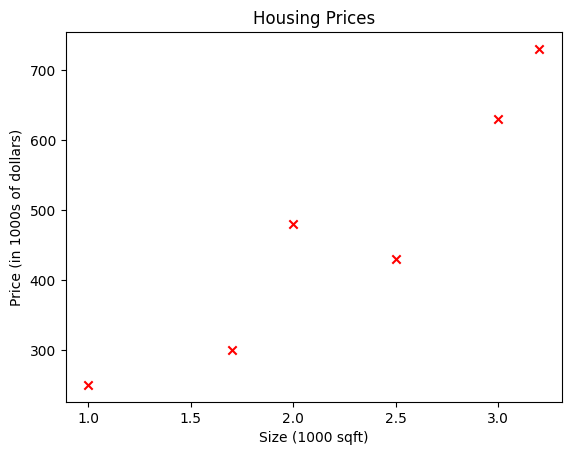

In [3]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

### 2. Linear Regression Model for w= 100, b=100

In [4]:
w = 100
b = 100
print(f"Y = {w}x+{b}")

Y = 100x+100


### 3. Predict 'Y' using Linear Regression w = 100 and b = 100.

In [5]:
y_pred = np.array([0,0,0,0,0,0])
i = 0
for i in range(0, 6):
    y_pred[i] = w*x[i]+b
    print(f"when x = {x[i]}  then predicted y = {y_pred[i]}")

when x = 1.0  then predicted y = 200
when x = 1.7  then predicted y = 270
when x = 2.0  then predicted y = 300
when x = 2.5  then predicted y = 350
when x = 3.0  then predicted y = 400
when x = 3.2  then predicted y = 420


In [6]:
y_pred

array([200, 270, 300, 350, 400, 420])

####                                                               OR

In [7]:
x = np.array([1.0,1.7,2.0,2.5,3.0,3.2])
def predict_y(w,x,b):
    y_pred = np.dot(w,x) + b
    return y_pred

In [8]:
w = 100
b = 100
x = np.array([1.0,1.7,2.0,2.5,3.0,3.2])
y_pred =  predict_y(w,x,b)
print(y_pred)

[200. 270. 300. 350. 400. 420.]


### 4.Plot Actual and Predicted Values

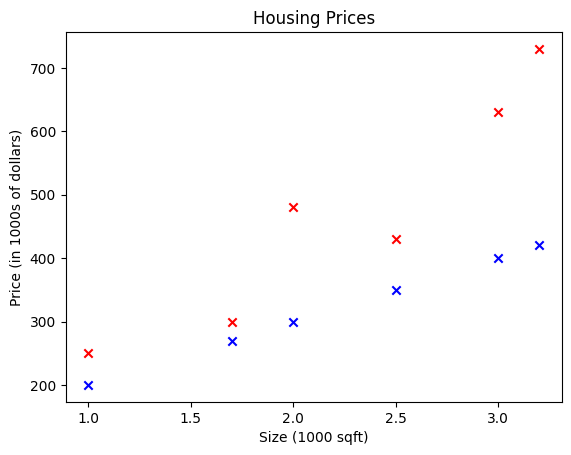

In [9]:
# Plot the data points
plt.scatter(x, y_pred, marker='x', c='blue')
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

### 5. Fit the Linear Regression curve on predicted values

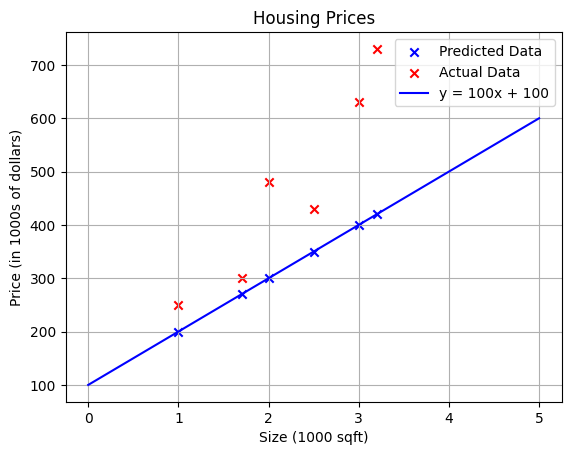

In [10]:
# Plot the data points
plt.scatter(x, y_pred, marker='x', c='blue',label='Predicted Data')
plt.scatter(x, y, marker='x', c='r',label='Actual Data')

# Define two points using NumPy arrays
x_values = np.array([0, 5])  # x = 0 and x = 5
y_values = w * x_values + b  # Calculate y for both points

# Plotting the line
plt.plot(x_values, y_values, label=f'y = {w}x + {b}', color='blue')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')

# Show the legend
plt.grid(True)
plt.legend()
plt.show()

### 6. Cost calculation Using Cost Function

In [11]:
def calculate_cost(y,y_pred):
    diff = np.subtract(y_pred,y)
    sqr_diff = np.square(diff)
    m = len(y)
    j = (1/(2*m)) * np.sum(sqr_diff)
    return j

In [12]:
cost = calculate_cost(y,y_pred)
print(cost)

15933.333333333332


### 7. Calculate Gradient

In [13]:
def Calculate_gradient(x,y,y_pred):
    diff = np.subtract(y_pred,y)
    m = len(y)
    dj_dw = (1/m) * np.dot(diff,x.T)
    dj_db = (1/m) * np.sum(diff)
    return dj_dw, dj_db

In [14]:
dj_dw, dj_db = Calculate_gradient(x,y,y_pred)
print( dj_dw)
print( dj_db)

-390.5
-146.66666666666666


### 8. Optimize Weights

In [15]:
def optimize_weights(w,x,b,y,iter):
    dj_dw = dj_db = 0
    alpha = 0.001
    w_all = np.zeros(iter)
    b_all = np.zeros(iter)
    cost_all = np.zeros(iter)
    
    for i in range(0,iter):
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        y_pred = predict_y(w,x,b)
        cost = calculate_cost(y,y_pred)
        print(f"For Iteration{i} w = {w}, b = {b} and cost = {cost}")
        #print(f"dj_dw = {dj_dw} , dj_db = {dj_db}")
        dj_dw, dj_db = Calculate_gradient(x,y,y_pred)
        w_all[i] = w
        b_all[i] = b
        cost_all[i] = cost
        
    return w_all,b_all,cost_all
        

In [16]:
w = 50
b =10
x = np.array([1.0,1.7,2.0,2.5,3.0,3.2])
y = np.array([250,300,480,430,630,730])
m = len(x)
iter = 1000
w_all, b_all, cost_all = optimize_weights(w,x,b,y,iter)

For Iteration0 w = 50.0, b = 10.0 and cost = 69712.5
For Iteration1 w = 50.86966666666667, b = 10.348333333333333 and cost = 68837.68482862759
For Iteration2 w = 51.73371714333334, b = 10.694376077777777 and cost = 67974.16040297133
For Iteration3 w = 52.59218779038555, b = 11.038143066746555 and cost = 67121.78099396412
For Iteration4 w = 53.44511473279597, b = 11.379649037614614 and cost = 66280.40275345734
For Iteration5 w = 54.29253386164851, b = 11.718908632340423 and cost = 65449.88368994396
For Iteration6 w = 55.134480835652646, b = 12.055936398083734 and cost = 64630.08364459495
For Iteration7 w = 55.97099108264791, b = 12.39074678781936 and cost = 63820.864267604986
For Iteration8 w = 56.80209980109865, b = 12.723354160946961 and cost = 63022.08899484342
For Iteration9 w = 57.62784196157909, b = 13.053772783896894 and cost = 62233.623024806715
For Iteration10 w = 58.4482523082488, b = 13.382016830732137 and cost = 61455.33329586828
For Iteration11 w = 59.2633653603186, b = 13.

In [17]:
min_value = np.min(cost_all) # Finding the minimum value
min_index = np.argmin(cost_all) # Finding the position (index) of the minimum value
cost = min_index 
w = w_all[min_index]
b = b_all[min_index]
print(f"Optimize value of w = {w}, b = {b}, with Cost = {cost}")

Optimize value of w = 185.92845366316362, b = 59.284041978767135, with Cost = 999


### 9. Scatter Plot and Curve fitting for optimized value of w and b

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x = np.array([1.0,1.7,2.0,2.5,3.0,3.2])
y_pred = predict_y(x,w,b)
print(y_pred)

[245.21249564 375.36241321 431.14094931 524.10517614 617.06940297
 654.2550937 ]


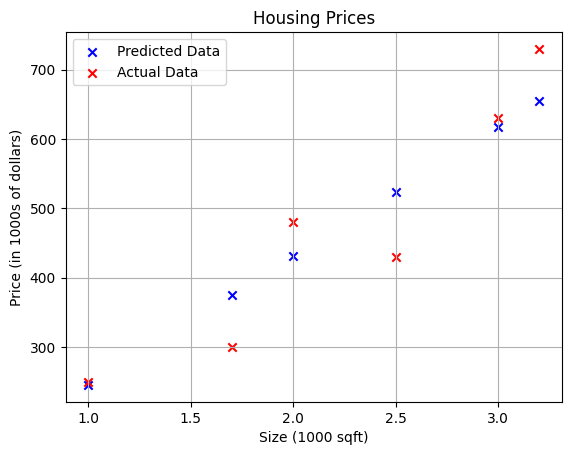

In [20]:
# Plot the data points
plt.scatter(x, y_pred, marker='x', c='blue',label='Predicted Data')
plt.scatter(x, y, marker='x', c='r',label='Actual Data')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')

plt.grid(True)
plt.legend()
plt.show()

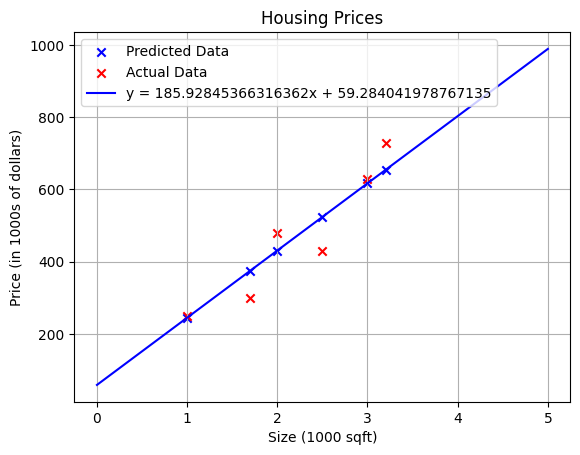

In [21]:
# Plot the data points
plt.scatter(x, y_pred, marker='x', c='blue',label='Predicted Data')
plt.scatter(x, y, marker='x', c='r',label='Actual Data')

# Define two points using NumPy arrays
x_values = np.array([0, 5])  # x = 0 and x = 5
y_values = w * x_values + b  # Calculate y for both points

# Plotting the line
plt.plot(x_values, y_values, label=f'y = {w}x + {b}', color='blue')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')

# Show the legend
plt.grid(True)
plt.legend()
plt.show()

### 10. Plot Cost Function w.r.t number of iteration

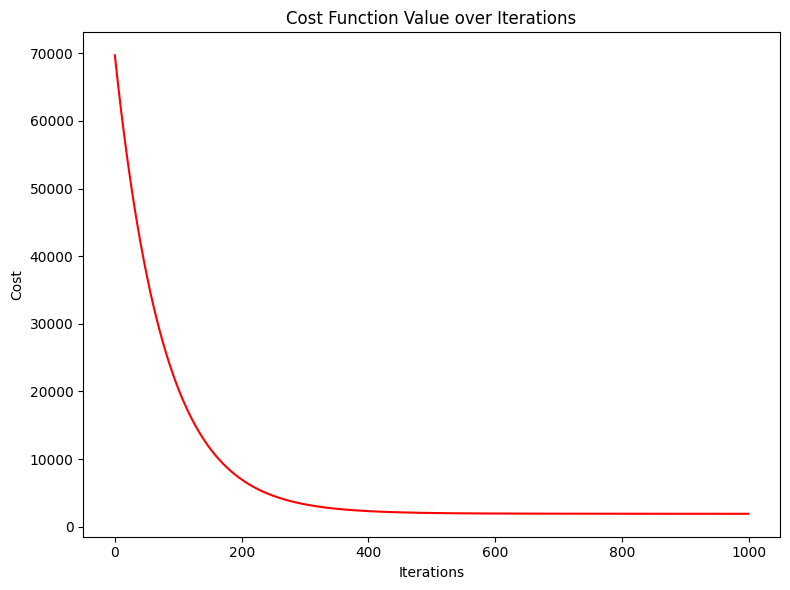

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the weight values over iterations
plt.figure(figsize=(8, 6))

# Plot for cost_all
plt.plot(cost_all, color='red')
plt.title('Cost Function Value over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


### 11. Number of iteration required for training

In [ ]:
 iteration = 500

### 12. Cost function plot w.r.t w and b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
ax.plot_trisurf(w_all, b_all, cost_all, cmap='viridis', edgecolor='none')

# Set labels
ax.set_title('Cost Function with respect to w and b')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost')

# Show the plot
plt.show()


## Example-2:
Given below is the Years of Experience (in years) and the Salary (in thousands of dollars) for employees in a tech company:
<div style="text-align: center;">
    <img src="Salary.png" alt="Employee Table" style="width:35%;"/>
</div>

1) Plot the given data of Years of Experience and Salary in a Scatter Plot.
2) Form the Linear Regression model with w=8 and  ùëè = 0
3) Predict the Salary using the Linear Regression model when ùë§ = 8 and  b=0
4) Plot both Predicted and Actual Values of the Salary in a Scatter Plot.
5) Fit the Linear Regression Line for the Predicted Values of the Salary with respect to Years of Experience.
6) Calculate the Cost Value using the Linear Regression Cost Function.
7) Find the Optimized Values of ùë§ and b using the Gradient Descent algorithm. (Take initial values w=5, b=30, iterations = 1000, and LR = 0.01)
8) Fit the Linear Regression line using the optimized values of w and b, and also show the Actual and Predicted values on a Scatter Plot.
9) Plot the Curve to show How the Cost Value changes with respect to the Number of Iterations.
10) From the Graph, determine How Many Iterations are sufficient to train the Model.
11) Plot the Curve to show How Cost Values change with respect to weights.